# 02. Neural Network Classification with PyTorch 

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

Resources: https://www.learnpytorch.io/02_pytorch_classification/

In [263]:
import torch
from torch import nn

print(torch.__version__)

2.7.1


## 1. Make classification data and get it ready

In [264]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.05,
    random_state=4
)

In [265]:
len(X), len(y)

(1000, 1000)

In [266]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[-0.62899052  0.46718274]
 [ 0.45081395  0.67670509]
 [-0.81272057 -0.16994687]
 [-0.66015042 -0.43389572]
 [ 0.84586661  0.27667558]]
First 5 samples of y:
 [1 1 1 1 1]


In [267]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0], 
    "X2": X[:, 1],
    "label": y
})

circles.head(10)

,X1,X2,label
0,-0.628991,0.467183,1
1,0.450814,0.676705,1
2,-0.812721,-0.169947,1
3,-0.660150,-0.433896,1
4,0.845867,0.276676,1
5,-0.537463,-0.565597,1
6,0.652109,-0.336089,1
7,0.772069,-0.000567,1
8,-0.583008,-0.563453,1
9,-0.327103,1.023284,0


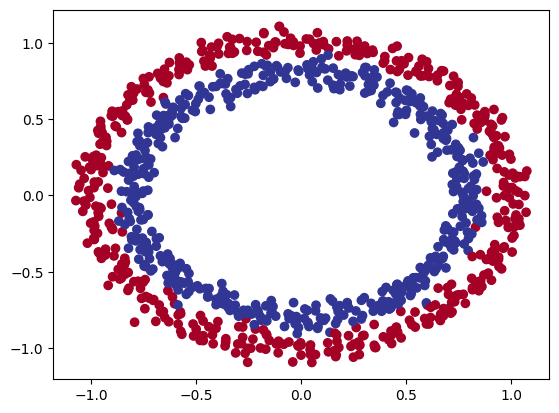

In [268]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)
plt.show()

**Note:** The data we're working with is reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [269]:
X.shape, y.shape

((1000, 2), (1000,))

In [270]:
X

array([[-0.62899052,  0.46718274],
       [ 0.45081395,  0.67670509],
       [-0.81272057, -0.16994687],
       ...,
       [ 0.73640306, -0.661122  ],
       [-0.54084467,  0.82477198],
       [ 0.07277009,  0.9536204 ]], shape=(1000, 2))

In [271]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [272]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.62899052  0.46718274] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [273]:
# Turn data into tensors
X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(array([[-0.62899052,  0.46718274],
        [ 0.45081395,  0.67670509],
        [-0.81272057, -0.16994687],
        [-0.66015042, -0.43389572],
        [ 0.84586661,  0.27667558]]),
 array([1, 1, 1, 1, 1]))

In [274]:
type(X_tensor), X_tensor.dtype, y_tensor.dtype

(torch.Tensor, torch.float32, torch.float32)

In [275]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, 
    test_size=0.2, # 0.2 = 20% of data will be test and 80% will be train
    random_state=42, # random seed 
)

In [276]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

 Let's build a model to classify our blue and red dots.

 To do so, we want to:
 1. Set up device agnostic code so our code will run on an accelerator (GPU / MPS) if there is one
 2. Construct a model (by subclassing `nn.Module`)
 3. Define a loss function and optimizer
 4. Create a training and test loop

In [277]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "mps"
device

'mps'

In [278]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

Now we've set up device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [279]:
# 1. Construct the model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outpus a single feature (same shape as y)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [280]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [281]:
next(model_0.parameters()).device

device(type='mps', index=0)

In [282]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='mps:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='mps:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='mps:0')),
             ('layer_2.bias', tensor([-0.2060], device='mps:0'))])

In [283]:
# Let's replicate the model about using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [284]:
model_0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [285]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='mps:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='mps:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='mps:0')),
             ('1.bias', tensor([-0.1213], device='mps:0'))])

In [286]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[ 0.3083],
        [ 0.2716],
        [ 0.0280],
        [-0.0170],
        [ 0.0749],
        [ 0.0911],
        [ 0.1591],
        [ 0.1912],
        [-0.0374],
        [ 0.2712]], device='mps:0')

First 10 labels: 
tensor([0., 1., 1., 1., 0., 1., 0., 1., 1., 1.])


### 2.1 Set up loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolut error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a remidner, the loss function measures how "wrong" your model's predictions are

And for optimizers, two of the most common and useful are SGD and Adam, hower PyTorch has many build-in options

* For some common choices of loss function and optimizers - https://medium.com/analytics-vidhya/optimizer-loss-functions-in-neural-network-2520c244cc22
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article - 
* For a definition on what a logit is in deep learning - https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow
* For difference optimizer see `torch.optim` - https://www.google.com/search?q=torch+optimizer&oq=torch+optim&gs_lcrp=EgZjaHJvbWUqBwgAEAAYgAQyBwgAEAAYgAQyBggBEEUYOTIJCAIQABgKGIAEMgcIAxAAGIAEMgcIBBAAGIAEMgcIBRAAGIAEMgcIBhAAGIAEMgYIBxBFGDzSAQg2MDEzajBqNKgCALACAA&sourceid=chrome&ie=UTF-8

In [287]:
# Setup the loss function
loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation functions prior to input to BCELoss
nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss()
)

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [288]:
# Calculate accuracy - out of 100 examples what percentage does out model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc 

## 3. Train model

To train out model, we're goint to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimzer zero grad
4. Loss backward (backpropagation)
5. Optimizer (gradient descent)

### 3.1 Going from raw logits to prediction probabilietes to prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilites by passing them ot some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert out model's prediction probabilites to **prediction labels** by either rounding them or taking the `argmax()`

In [289]:
# View the first 5 outputs of the forward pass on the test ddata
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[ 0.3083],
        [ 0.2716],
        [ 0.0280],
        [-0.0170],
        [ 0.0749]], device='mps:0')

In [290]:
y_test[:5]

tensor([0., 1., 1., 1., 0.])

In [291]:
# Use the sigmoid activation function on our model logits to turn them into probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5765],
        [0.5675],
        [0.5070],
        [0.4958],
        [0.5187]], device='mps:0')

For our predicition probability values, we need to perform a range-styel rounding on them:
* `y_pred_probs >= 0.5`, `y=1` (class 1)
* `y_pred_probs < 0.5`, `y=0` (class 0)

In [292]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([1., 1., 1., 0., 1.], device='mps:0')

### 3.2 Building a training and testing loop

In [293]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probabilities -> pred labels

    # 2. Calculate loss / accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilites as input
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forawrd pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        tess_acc = accuracy_fn(y_test, test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {tess_acc:.2f}%")

Epoch: 0 | Loss: 0.69847 | Acc: 51.75% | Test loss: 0.69235 | Test acc: 56.50%
Epoch: 10 | Loss: 0.69605 | Acc: 50.75% | Test loss: 0.69179 | Test acc: 53.50%
Epoch: 20 | Loss: 0.69490 | Acc: 50.62% | Test loss: 0.69188 | Test acc: 53.50%
Epoch: 30 | Loss: 0.69428 | Acc: 50.12% | Test loss: 0.69211 | Test acc: 52.00%
Epoch: 40 | Loss: 0.69390 | Acc: 50.12% | Test loss: 0.69236 | Test acc: 52.00%
Epoch: 50 | Loss: 0.69366 | Acc: 49.62% | Test loss: 0.69258 | Test acc: 52.50%
Epoch: 60 | Loss: 0.69350 | Acc: 48.75% | Test loss: 0.69277 | Test acc: 53.50%
Epoch: 70 | Loss: 0.69338 | Acc: 49.00% | Test loss: 0.69294 | Test acc: 53.00%
Epoch: 80 | Loss: 0.69330 | Acc: 48.50% | Test loss: 0.69308 | Test acc: 54.00%
Epoch: 90 | Loss: 0.69324 | Acc: 47.25% | Test loss: 0.69320 | Test acc: 53.50%


## 4. Make predictions and evaluatie thte model

From the metrics it looks like our model isn't learning anything...

So let's it make some predictions and make them visual

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [294]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exits, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exits, skipping download


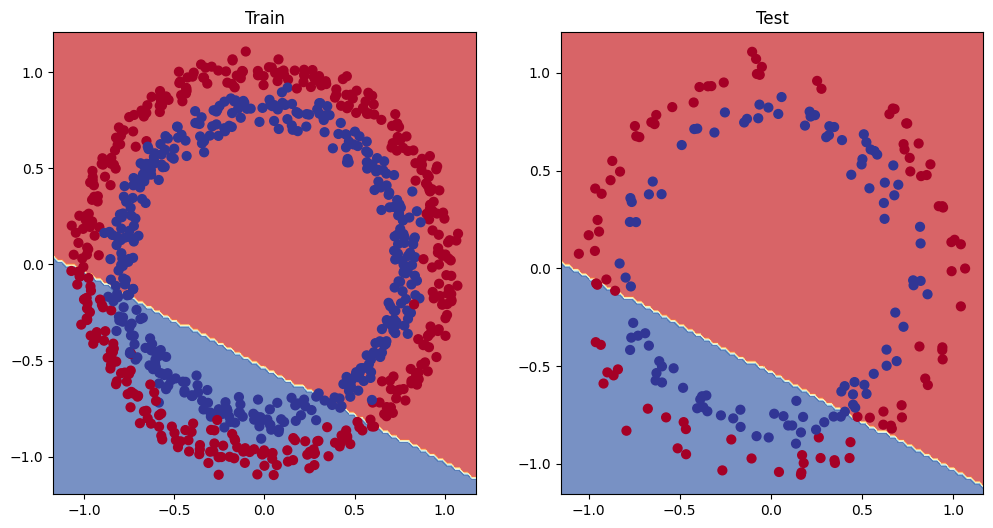

In [295]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer - moge epochs
* Change the activation function
* Change the optimization functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal direclty with the model, rather than the data

And because these options are all values we can change, they are referred as **hyperparameters**

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [296]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z1 = self.layer_1(x)
        # z2 = self.layer_2(z1)
        # z3 = self.layer_3(z2)
        # return z3
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverage speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)

In [297]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [298]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='mps:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='mps:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222,

In [299]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

# Create an optimizer
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.1
)

In [300]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probabilities -> pred labels

    # 2. Calculate loss / accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilites as input
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forawrd pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        tess_acc = accuracy_fn(y_test, test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {tess_acc:.2f}%")

Epoch: 0 | Loss: 0.69359 | Acc: 51.62% | Test loss: 0.69387 | Test acc: 49.50%
Epoch: 100 | Loss: 0.69306 | Acc: 48.38% | Test loss: 0.69411 | Test acc: 42.00%
Epoch: 200 | Loss: 0.69304 | Acc: 47.75% | Test loss: 0.69407 | Test acc: 39.50%
Epoch: 300 | Loss: 0.69304 | Acc: 48.00% | Test loss: 0.69407 | Test acc: 39.50%
Epoch: 400 | Loss: 0.69304 | Acc: 47.75% | Test loss: 0.69408 | Test acc: 41.00%
Epoch: 500 | Loss: 0.69304 | Acc: 48.12% | Test loss: 0.69408 | Test acc: 42.00%
Epoch: 600 | Loss: 0.69304 | Acc: 48.00% | Test loss: 0.69408 | Test acc: 42.00%
Epoch: 700 | Loss: 0.69304 | Acc: 48.00% | Test loss: 0.69408 | Test acc: 42.00%
Epoch: 800 | Loss: 0.69304 | Acc: 48.00% | Test loss: 0.69409 | Test acc: 42.00%
Epoch: 900 | Loss: 0.69304 | Acc: 48.00% | Test loss: 0.69409 | Test acc: 42.00%


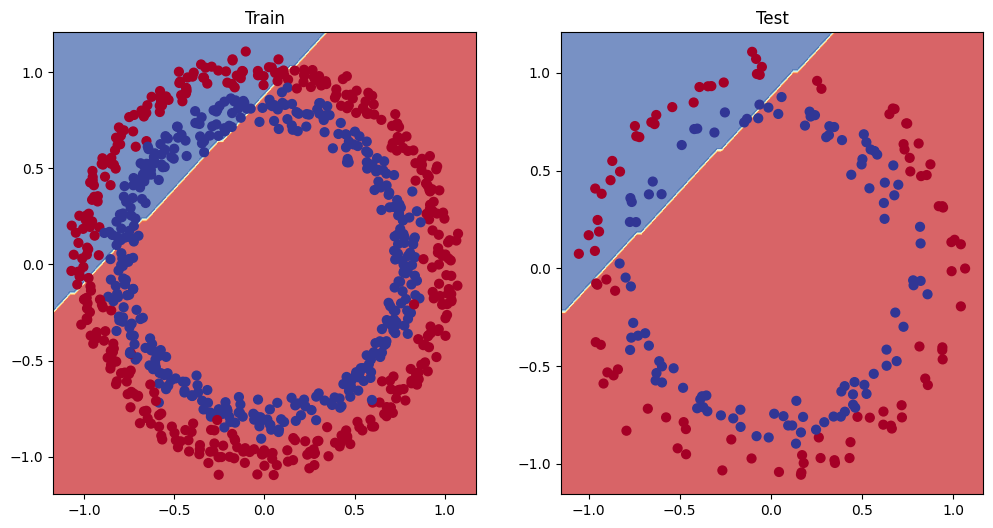

In [301]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()